# Segmenting Ripe Strawberries by Thresholding the Red and Green Color Planes

In [1]:
import cv2
import matplotlib.pyplot as plt

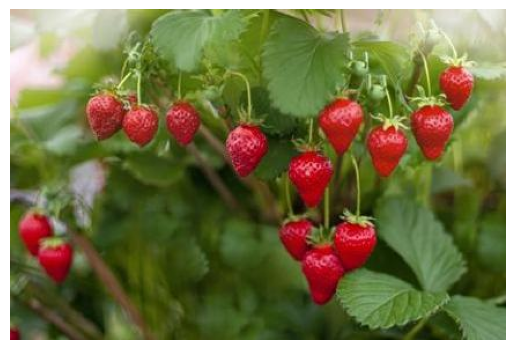

In [2]:
strawberry = cv2.imread("./images/strawberryPlant.jpg")
strawberry = cv2.cvtColor(strawberry, cv2.COLOR_BGR2RGB)
red, green, blue = cv2.split(strawberry)

plt.imshow(strawberry)
plt.axis("off")
plt.show()

Extract individual color planes by cv2.split().

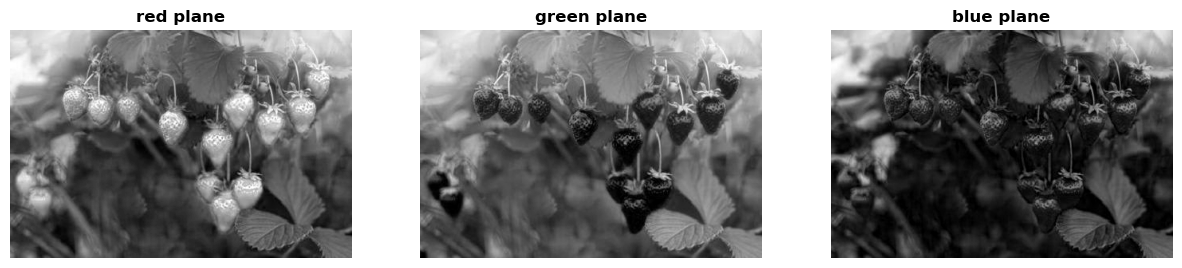

In [3]:
red, green, blue = cv2.split(strawberry)

fig, axs = plt.subplots(1, 3, figsize=(15, 15))
axs[0].imshow(red, cmap='gray')
axs[0].axis('off')
axs[0].set_title('red plane')
axs[1].imshow(green, cmap='gray')
axs[1].axis('off')
axs[1].set_title('green plane')
axs[2].imshow(blue, cmap='gray')
axs[2].axis('off')
axs[2].set_title('blue plane')
plt.show()

The strawberries are red, so we will try segmentation using the red color plane. By itself, the red color plane is a grayscale image.
One way to segment a grayscale image is to binarize it.

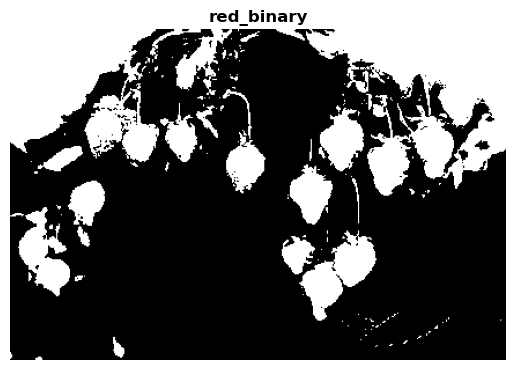

In [4]:
_, red_binary = cv2.threshold(red, 127, 255, cv2.THRESH_OTSU) # https://en.wikipedia.org/wiki/Otsu%27s_method

plt.imshow(red_binary, cmap='gray')
plt.axis('off')
plt.title('red_binary')
plt.show()

The segmentation using cv2.threshold() included too many pixels. We can try setting a global threshold manually with a relational operator.

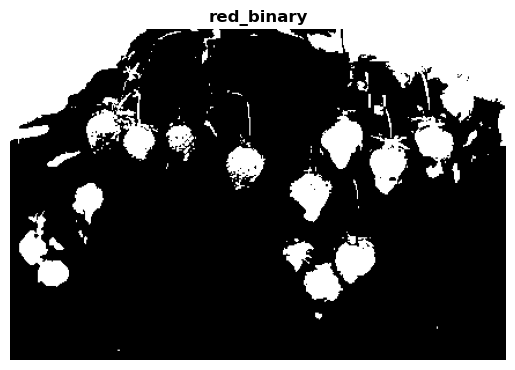

In [5]:
red_binary = red > 150
plt.imshow(red_binary, cmap='gray')
plt.axis('off')
plt.title('red_binary')
plt.show()

The corners have high intensities for all of the color planes since they are bright. So, they will be hard to exclude using the red color plane.
Since red and green are the dominant colors in this image, another way to identify the strawberries is to look for pixels without much green.

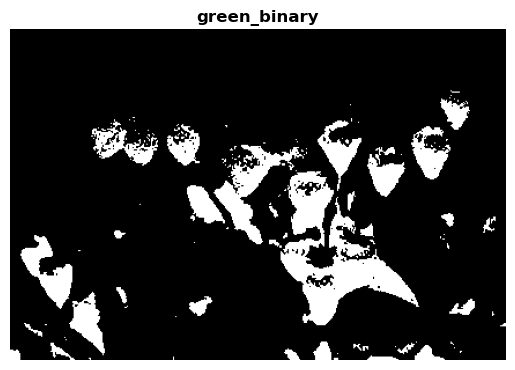

In [6]:
green_binary = green < 50
plt.imshow(green_binary, cmap='gray')
plt.axis('off')
plt.title('green_binary')
plt.show()